In [1]:
%matplotlib inline

In [2]:
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sklearn
import sklearn.linear_model
from datetime import datetime, date
from sklearn_pandas import DataFrameMapper
import warnings
import timeit
from collections import defaultdict, OrderedDict
import tabulate
import time
import GPy
from IPython.display import display
import scipy
from scipy import stats
from fbprophet import Prophet

timeit.template = """
def inner(_it, _timer{init}):
    {setup}
    _t0 = _timer()
    for _i in _it:
        retval = {stmt}
    _t1 = _timer()
    return _t1 - _t0, retval
"""

matplotlib.style.use('ggplot')

RANDOM_SEED = 33

In [4]:
mauna_loa = pandas.read_csv(r'./weekly_in_situ_co2_mlo_data_only.csv')
mauna_loa.head()

,ds,y
0,29/03/1958,316.19
1,05/04/1958,317.31
2,12/04/1958,317.69
3,19/04/1958,317.58
4,26/04/1958,316.48


In [5]:
TEST_SIZE = 52 * 5
train = mauna_loa[:-TEST_SIZE]
test = mauna_loa[-TEST_SIZE:]

In [6]:
m = Prophet(weekly_seasonality=True)
m.fit(train)
forecast = m.predict(test)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
255,2017-10-21,404.695571,403.399493,406.024146,400.222146,405.064617,-2.125759,-2.125759,-2.125759,-2.125759,-2.125759,-2.125759,-0.008876,-0.008876,-0.008876,-2.116883,-2.116883,-2.116883,402.569812
256,2017-10-28,404.734888,403.425878,406.070283,399.980545,404.660391,-2.349732,-2.349732,-2.349732,-2.349732,-2.349732,-2.349732,-0.008876,-0.008876,-0.008876,-2.340856,-2.340856,-2.340856,402.385156
257,2017-11-02,404.762972,403.443913,406.103238,400.485207,405.263720,-1.872542,-1.872542,-1.872542,-1.872542,-1.872542,-1.872542,0.339109,0.339109,0.339109,-2.211651,-2.211651,-2.211651,402.890429
258,2017-11-03,404.768588,403.447705,406.109829,399.863334,404.841649,-2.446825,-2.446825,-2.446825,-2.446825,-2.446825,-2.446825,-0.295214,-0.295214,-0.295214,-2.151611,-2.151611,-2.151611,402.321763
259,2017-12-08,404.965174,403.602323,406.347889,400.911959,405.773939,-1.693935,-1.693935,-1.693935,-1.693935,-1.693935,-1.693935,-0.295214,-0.295214,-0.295214,-1.398720,-1.398720,-1.398720,403.271239


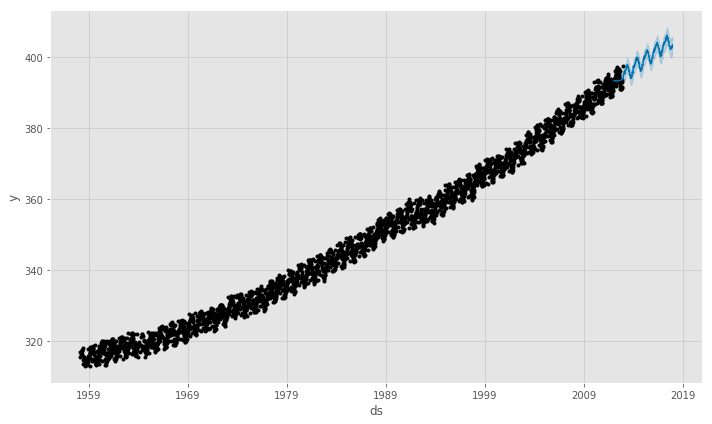

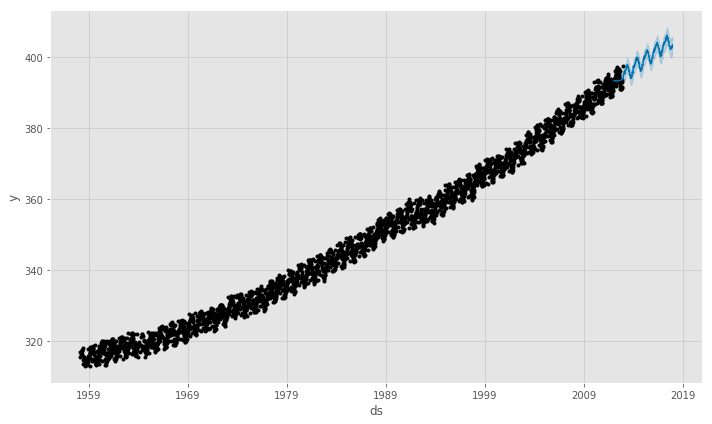

In [8]:
m.plot(forecast)

In [9]:
np.mean((forecast.yhat.as_matrix() - test.y.as_matrix()) ** 2)

3.76703746032649

In [10]:
future = m.make_future_dataframe(periods=40 * 52, freq='W')
future_forecast = m.predict(future)

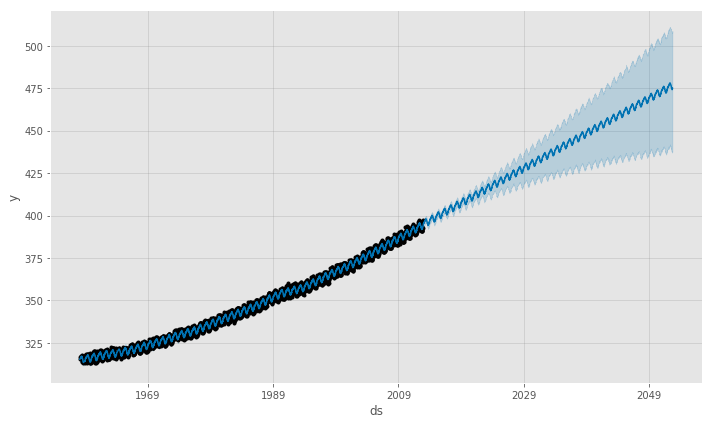

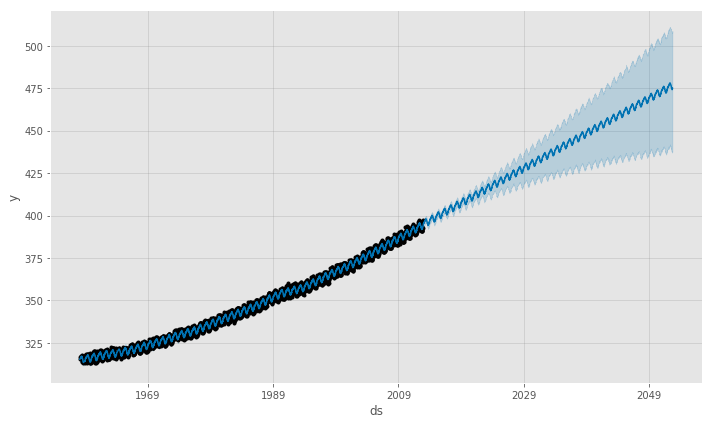

In [11]:
m.plot(future_forecast)